# <b>Last modified on November 11 at 11:15 pm</b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Older Material on Lists

In [2]:
# Code below allows Jupyter to prints multiple outputs, not just one on last line
# Only use if you've already used
# get_ipython().ast_node_interactivity = 'all'  

In [3]:
l = [10, 2.0, '5']

In [4]:
# Looping over elements of an object
for element in l:
    print(element)

10
2.0
5


In [5]:
# Looping over index values of an object
for num in range(len(l)):
    print(num, l[num])

0 10
1 2.0
2 5


<b>List comprehension</b>'s most common form:

\[ \{output statement\} \{for statement\} \{if statement\} \], where if statement is optional and where you have the option to nest if statements

In [6]:
# List containing numbers 0, 0.1, 0.2, ..., 1.0
[num/10 for num in range(1,11)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [7]:
# Combining two lists of the same length into a list of lists

l1 = range(1,6)
l2 = ['a','b','c','d','e']
l3 = [[l1[num], l2[num]] for num in range(len(l1))]
l3

[[1, 'a'], [2, 'b'], [3, 'c'], [4, 'd'], [5, 'e']]

In [8]:
s = 'AaAaAaAAbBCcddEEEfgGgHHhIjjjjj'

In [9]:
s.lower()

'aaaaaaaabbccddeeefggghhhijjjjj'

In [10]:
s.count('A')

5

In [11]:
l_upper = [element   for element in s   if element.isupper()]
print(l_upper)

['A', 'A', 'A', 'A', 'A', 'B', 'C', 'E', 'E', 'E', 'G', 'H', 'H', 'I']


In [12]:
# reverse=True sorts from highest to lowest; default is to sort from lowest to highest
# optional key controls how elements are evaluating by sorting algorithm

lol2 = [[element, s.count(element)] for element in sorted(set(s))]
print(sorted(lol2, reverse=True))  

[['j', 5], ['h', 1], ['g', 2], ['f', 1], ['d', 2], ['c', 1], ['b', 1], ['a', 3], ['I', 1], ['H', 2], ['G', 1], ['E', 3], ['C', 1], ['B', 1], ['A', 5]]


In [13]:
# Sort by last element

def last(l):
    return l[-1]

print(sorted(lol2, key=last))

[['B', 1], ['C', 1], ['G', 1], ['I', 1], ['b', 1], ['c', 1], ['f', 1], ['h', 1], ['H', 2], ['d', 2], ['g', 2], ['E', 3], ['a', 3], ['A', 5], ['j', 5]]


### Finance Formulas

Cumulative n-period net return $ = (1+r_1)(1+r_2) \cdots (1+r_n) - 1$

Geometric average n-period net return $ = \left( (1+r_1)(1+r_2) \cdots (1+r_n) \right)^{\frac{1}{n}} - 1$

In [14]:
rets = np.random.normal(0.02,0.02,(10,10))

rets[0,2:5] = np.nan
rets[3,3:8] = np.nan
rets[-1,-4:] = np.nan

c = np.nancumprod(1+rets, axis = 1)[:,-1]-1
n = np.sum(~np.isnan(rets),axis = 1) 

print(n)
print((1+c)**(1/n)-1)

[ 7 10 10  5 10 10 10 10 10  6]
[0.03332727 0.01669813 0.00840742 0.03158479 0.00669271 0.01810412
 0.00911199 0.02982557 0.01956263 0.01346246]


### Simulating Random Variables

In [15]:
np.random.normal(0.05,0.15, (5,12))   # Normal with mean 5%, std 15%, 5 rows and 12 columns
np.random.binomial(82,0.6, (10000,))  # 10000 seasons; each season is winning record for team with 60% prob of winning
np.random.random((100,))              # 100 draws from uniform [0,-1]
(np.random.random((5,4)) >= 0.5)*1    # 1s and 0s in (5,4) array based on fair coin flips
np.random.binomial(1,0.5,(5,4))       # 1s and 0s in (5,4) array based on fair coin flips

array([[0, 0, 1, 1],
       [0, 1, 0, 1],
       [1, 1, 0, 0],
       [0, 1, 1, 1],
       [1, 0, 0, 1]])

In [16]:
# Using winning records in basketball seasons
# to estimate probability of 56 or more wins
# when probability winning = 60%

sim = np.random.binomial(82,0.6, (10000,))

prob1a = sum([1 for x in sim if x>=56]) / len(list(sim))

prob1b = sim[sim>=56].size / sim.size

prob1c = np.mean(np.where(sim>=56, 1, 0))

prob1d = np.mean(sim>=56)

print(prob1a, prob1b, prob1c, prob1d)

# If you wanted to measure probability of winning between 56 and 58 games...

prob2a = sum([1 for x in sim if x>=56 and x<=58]) / len(list(sim))

prob2b = (sim[(sim>=56)*(sim<=58)]).size / sim.size

prob2c = np.mean(np.where((sim>=56)*(sim<=58), 1, 0))

prob2d = np.mean((sim>=56)*(sim<=58))

print(prob2a, prob2b, prob2c, prob2d)

# If you want to compare winning records of different teams in same hypothetical season

win50 = np.random.binomial(82, 0.50, 10000)
win45 = np.random.binomial(82, 0.45, 10000)

np.mean(win50 < win45)

0.0749 0.0749 0.0749 0.0749
0.0583 0.0583 0.0583 0.0583


0.233

### Creating Arrays and Basic Math

In [17]:
l = [[1, 2, 3, 4], [5, 6, 7, 8]]
a = np.array(l)

In [18]:
a.shape, a.size

((2, 4), 8)

In [19]:
b = np.array(range(20,9,-2))
b

array([20, 18, 16, 14, 12, 10])

In [20]:
c = np.arange(0,6)
c

array([0, 1, 2, 3, 4, 5])

In [21]:
(2*b)**c

array([      1,      36,    1024,   21952,  331776, 3200000])

### Slicing Arrays

In [22]:
tmp = np.arange(1,9).reshape(2,4)
print(tmp)

# Slicing to access elements

print(tmp[0,:])   # row 0
print(tmp[:,-1])  # last column
print(tmp[0,2:])  # row 0, columns with index value 2 through end

# Slicing to replace elements

tmp[0,0:2] = [-5, 0]
print(tmp)

[[1 2 3 4]
 [5 6 7 8]]
[1 2 3 4]
[4 8]
[3 4]
[[-5  0  3  4]
 [ 5  6  7  8]]


### Combining and Sorting Arrays

I would be surprised if you wanted to use these commands during Midterm 3

In [23]:
# np.concatenate ((array1,array2 ), axis ) combines the arrays within the inner ( ) 
#    & axis determines whether new array added to bottom of existing array (axis = 0) 
#      or on the side of existing array (axis =1)
# np.vstack(()) can also be used to stack arrays vertically. Notice the double ( )
# np.hstack(()) can also be used to stack arrays horizontally. Notice the double ( )
# np.sort() sorts array from smallest to largest

### Syntax (mostly repeated elsewhere)

In [24]:
# np.reshape(rows, columns)
# np.arange(min, max+1)
# np.vstack((array1, array2, array3))

# np.any(condition)
# np.all(condition)
# np.where(condition, true, false)

# np.random.multivariate_normal(m, cov, (structure,)).T

### Summary Statistics and Basic Filtering

In [25]:
ret = np.random.normal(0.05,0.15, (48,5))

ret[ret<-1] = -1    # eliminates returns < -100%

ret[:,2] = ret[:,2] * 0.2*ret[:,3]
ret[-12:,0] = np.nan
ret[0:12,-1] = np.nan

ret[0,:], ret[-1,:]

(array([-0.12350144,  0.04895987, -0.00054981,  0.06213334,         nan]),
 array([        nan, -0.09676384, -0.00670477, -0.16592436, -0.03009094]))

In [26]:
yyyy = np.array([2020]*12 + [2021]*12 + [2022]*12 + [2023]*12)
fund = np.array(['A','B','C','D','E'])

In [27]:
# Summary statistic functions; array is mandatory, axis is optional
# axis = 0 calculates statistics down columns
# axis = 1 calculates statistics across rows

# np.sum(array, axis)
# np.mean(array, axis)
# np.median(array, axis)
# np.std(array, axis)
# np.percentile(array, 40, axis) -> 40th percentile
# np.cumprod(array, axis)
# np.ptp(array, axis) -> difference between maximum and minimum along axis (if specified)

# np.cumprod(1+array, axis=1)[-1] - 1    -> cumulative returns across unstructured array
# np.cumprod(1+array, axis=1)[:,-1] - 1  -> cumulative returns across rows of structured array
# np.cumprod(1+array, axis=0)[-1,:] - 1  -> cumulative returns down columns of structured array

# Adding nan to the function name excludes missing values

# np.nansum, np.nanmean(), ...

In [28]:
np.mean(ret, axis=0)  # average return within each column (with all non-missing)

array([        nan,  0.04621146, -0.00094711,  0.01492302,         nan])

In [29]:
np.mean(ret, axis=1)  # average return within each row (with all non-missing)

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan, -0.02279629, -0.01144186,  0.04954957,
       -0.01191522,  0.04149908,  0.08570245,  0.04944147,  0.0440593 ,
        0.08150629,  0.07943128,  0.10331568,  0.03403385, -0.06712191,
       -0.04038884, -0.00260025, -0.03386802,  0.01743617, -0.00707525,
        0.01209826,  0.05548885,  0.02451819, -0.0161586 ,  0.05210181,
       -0.04045688,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan])

In [30]:
np.nanmean(ret, axis=0)

array([ 0.05041808,  0.04621146, -0.00094711,  0.01492302,  0.01939151])

In [31]:
# Identifying missing and non-missing values

# To identify missing returns in column 0 (i.e., fund A)

print(np.isnan(ret[:,0]))

# To count missing returns in column 0 (i.e., fund A)

print(np.sum(np.isnan(ret[:,0])))

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True  True  True  True  True  True  True  True  True  True  True]
12


In [32]:
# To count missing returns in each column

print(np.sum(np.isnan(ret), axis = 0))

[12  0  0  0 12]


In [33]:
# To count non-missing returns in each column

print(np.sum(~np.isnan(ret), axis = 0))

[36 48 48 48 36]


In [34]:
# Identifies funds with no missing returns

np.sum(np.isnan(ret),0) == 0

array([False,  True,  True,  True, False])

In [35]:
# To keep non-missing returns for fund 'C'

retC = ret[:,fund=='C']
retC[~np.isnan(retC)]

array([-5.49808701e-04, -8.56359078e-04,  1.08919629e-03,  1.46477234e-03,
       -1.58736652e-03, -3.97230841e-03,  9.94656496e-03, -5.82499226e-03,
       -9.85862335e-05,  3.48403493e-03, -2.83787137e-03, -1.39558217e-03,
       -3.28563601e-03,  5.71358753e-04, -2.32569311e-03, -6.16130580e-04,
       -2.11908467e-03, -9.05314144e-04, -8.50971959e-03,  1.86095104e-04,
        6.17456253e-03, -5.90798956e-05,  5.06507382e-03, -3.05020820e-03,
       -7.34378619e-03, -2.52434772e-03,  1.43582228e-03,  3.71506518e-03,
       -3.12073029e-03,  1.29575949e-03,  3.07088882e-04,  7.02516676e-04,
        1.18809233e-03, -1.49614659e-02,  7.56500680e-03,  3.22903747e-03,
        4.11176190e-03, -1.01827970e-02,  9.86413822e-04,  1.28814900e-03,
        1.06531678e-03, -9.56115391e-03, -7.63526568e-03,  5.38029717e-04,
       -5.09987337e-03,  1.23210627e-03,  3.02482158e-03, -6.70477134e-03])

### Utility

In [36]:
# Utilities for terminal portfolio values

# bal start at 10,000, ends at 20,0000, with 6 points (increases by 2,000)

bal = np.linspace(10000, 20000, 6) 
util1 = np.log(bal)
util2 = np.sqrt(bal)

### Booleans and Replacing Values and Missing

In [37]:
tmp = np.arange(-5,5).reshape(2,5)

In [38]:
tmp < 0    # returns (2,5) with True when element < 0

array([[ True,  True,  True,  True,  True],
       [False, False, False, False, False]])

In [39]:
np.where(tmp < 0, 0, tmp)   # returns (2,5) with 0 or element

array([[0, 0, 0, 0, 0],
       [0, 1, 2, 3, 4]])

In [40]:
np.where(tmp < 0, 0, 1)     # returns (2,5) with 0 or 1 

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1]])

In [41]:
tmp[tmp<0] = 0   # changes elements of tmp that are < 0 to 0

In [42]:
np.any(tmp > 0), np.all(tmp > 0)

(True, False)

In [43]:
tmp = tmp.astype(float)
tmp[0,0] = tmp[-1,-1] = np.nan

In [44]:
np.any(np.isnan(tmp))

True

In [45]:
np.all(np.isnan(tmp))

False

In [46]:
tmp

array([[nan,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  2.,  3., nan]])

In [47]:
print(np.sum(np.isnan(tmp), axis = 1))  # both rows contain one missing
print(np.sum(np.isnan(tmp), axis = 0))  # columns 0 and 3 contain one missing

[1 1]
[1 0 0 0 1]


In [48]:
# switching from np.isnan() to ~np.isnan()

print(np.sum(~np.isnan(tmp), axis = 1))  # both rows contain three non-missing
print(np.sum(~np.isnan(tmp), axis = 0))  # columns 0 and 3 contain one non-missing; other columns contain 2 non-missing

[4 4]
[1 2 2 2 1]


### More Filtering

- `ret` is structured array of returns
- `yyyy` is array of calendar years
- `fund` is array of fund names

In [49]:
# Highest non-missing return for fund B or D, where statistic is pooled across funds?

print(np.max(ret[:,(fund=='B')+(fund=='D')]))

0.3177438253007201


In [50]:
# Highest non-missing return for fund B or C or D, where statistic is separate for each fund?

print(np.max(ret[:,(fund=='B')+(fund=='C')+(fund=='D')], axis=0))

[0.29829983 0.00994656 0.31774383]


In [51]:
# Calculate the average monthly return of fund A in 2021 and fund D in 2023.

ret_A2021 = ret[(yyyy==2021),:][:,fund=='A']
ret_D2023 = ret[(yyyy==2023),:][:,fund=='D']

np.mean(ret_A2021), np.mean(ret_D2023)

(0.0606542684785946, -0.0350306062322745)

In [52]:
# Calculate the average monthly return for each fund in each year... and store as a list of lists
# If statement excludes fund-years with all missing values

summary = []

for letter in sorted(set(list(fund))):
    for year in sorted(set(list(yyyy))):
        tmp = ret[yyyy==year,:][:,fund==letter]
        if np.sum(~np.isnan(tmp)) > 0:
            summary.append([letter, year, np.nanmean(ret[yyyy==year,:][:,fund==letter])])
summary

[['A', 2020, 0.08494353587108518],
 ['A', 2021, 0.0606542684785946],
 ['A', 2022, 0.005656444547394936],
 ['B', 2020, 0.049079372223556995],
 ['B', 2021, 0.05513732482964561],
 ['B', 2022, 0.012408143776977312],
 ['B', 2023, 0.06822098577923406],
 ['C', 2020, -9.485885346771948e-05],
 ['C', 2021, -0.0007394813322035474],
 ['C', 2022, -0.0007093284150997608],
 ['C', 2023, -0.0022447718516146247],
 ['D', 2020, 0.03555767815869328],
 ['D', 2021, 0.03745834613343458],
 ['D', 2022, 0.02170665238979955],
 ['D', 2023, -0.0350306062322745],
 ['E', 2021, 0.06515020437790554],
 ['E', 2022, -0.05823961295430458],
 ['E', 2023, 0.051263933187706744]]

In [53]:
# Calculate the cumulative net return of fund D in 2023

ret_D2023 = ret[(yyyy==2023),:][:,fund=='D']

print(ret_D2023.shape)

# While filtered values are a structured array, there is only set of returns

np.cumprod(1+ret_D2023, axis=1)[-1] - 1

(12, 1)


array([-0.16592436])

In [54]:
# Calculate the cumulative net return of each fund in 2022...
# being sure to notice that returns are stored in columns...
# which explains why I set axis=0

tmp = ret[yyyy==2022,:]

print(tmp.shape)   # 12 rows for each of the 5 funds

np.cumprod(1+tmp, axis=0)[-1,:] - 1

(12, 5)


array([-0.13264567,  0.07200718, -0.00866582,  0.13784321, -0.54434964])

In [55]:
# What is correlation in the returns of funds C and D?

np.corrcoef(ret[:,fund=='C'],ret[:,fund=='D'])[0,1]   # [0,1] is extracting correlation between two variables

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


nan

In [56]:
# Error message above arises because we are putting two columns into np.corrcoef()
# That function requires data formatted as rows or two unstructured arrays

ret[:,fund=='C'].shape

(48, 1)

In [57]:
tmpC = ret[:,fund=='C'].T   # switches from column to row
tmpD = ret[:,fund=='D'].T   # switches from column to row

np.corrcoef(tmpC,tmpD)[0,1]

0.6175666642918737

### Simulating Correlated Random Variables and Graphing

In [58]:
# corr(x,y)  = cov(x,y) / ((std(x) * std(y))
# cov(x,y)   = corr(x,y) * std(x) * std(y)

In [59]:
# Simulating 1000 pairs of correlated returns

(m1, sd1) = (0.12, 0.10)  # mean and std
(m2, sd2) = (0.03, 0.03)  # mean and std

# r1 and r2 are based on correlation of 0.5

corr_12 = 0.5
cov_12  = 0.5 * sd1 * sd2

m   = [m1, m2]
cov = [[sd1**2, cov_12], [cov_12, sd2**2]]

r1, r2 = np.random.multivariate_normal(m,cov,(1000,)).T

In [60]:
ave_r1 = np.mean(r1)
ave_r2 = np.mean(r2)

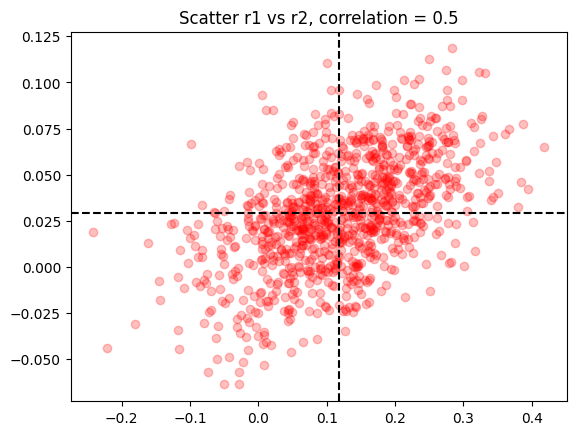

In [61]:
plt.scatter(r1,r2, color='red', alpha=0.25)
plt.axvline(ave_r1, color='black', linestyle='--', label='Mean r1')
plt.axhline(ave_r2, color='black', linestyle='--', label='Mean r2')
plt.title('Scatter r1 vs r2, correlation = 0.5')
plt.show()

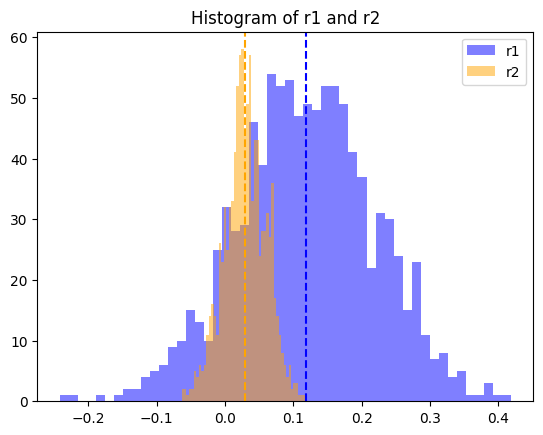

In [62]:
plt.hist(r1, bins=50, alpha = 0.5, color='blue', label='r1')
plt.hist(r2, bins=50, alpha = 0.5, color='orange', label='r2')
plt.axvline(x=ave_r1, color='blue', linestyle='--')
plt.axvline(x=ave_r2, color='orange', linestyle='--')
plt.title('Histogram of r1 and r2')
plt.legend()
plt.show()

### Using CAPM to Simulate Correlated Returns

In [63]:
rf =  np.random.normal(.02,0.02,(1,100))
mkt = np.random.normal(.08,0.18,(1,100))
mktrf = mkt-rf #calculate market excess return

#creating simulated stock returns with different betas
stock_beta_zero = rf + (0.0 * mktrf) + np.random.normal(0.00,0.18,(1,100))
stock_beta_half = rf + (0.5 * mktrf) + np.random.normal(0.00,0.18,(1,100))
stock_beta_one  = rf + (1.0 * mktrf) + np.random.normal(0.00,0.18,(1,100))
stock_beta_two  = rf + (2.0 * mktrf) + np.random.normal(0.00,0.18,(1,100))

#measuring correlations

np.corrcoef(stock_beta_two,stock_beta_half)

array([[1.        , 0.27242107],
       [0.27242107, 1.        ]])